In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import copy

from cascade.cascade import Cascade
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade = Cascade(
    datadir, 
    name="default",  
    elevation_file="barrier3d-default-elevation.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="barrier3d-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=26,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms="outwash_storm25.npy",  # --------- outwasher (in development) ------------ #
    washout_to_shoreface=True,
)

In [2]:
for time_step in range(cascade._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade.update()
    if cascade.b3d_break:
        break

 Time Step:  10

c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1501: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1502: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1503: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Outwasher Time Step:  1439

In [3]:
cascade.outwash[0]._Qs_shoreface

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 5692.95016223])

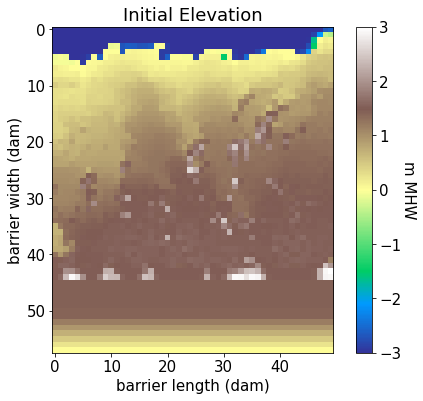

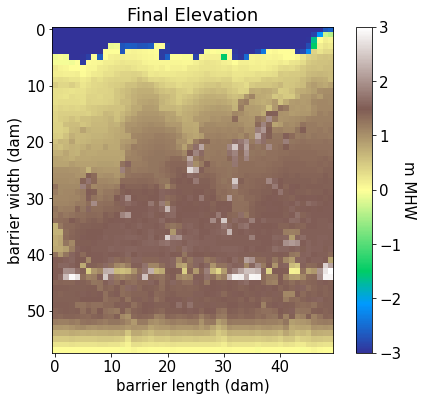

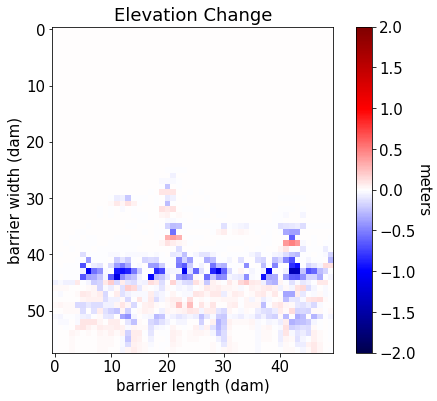

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = cascade.outwash[0]._initial_full_domain
final_domain = cascade.outwash[0]._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)



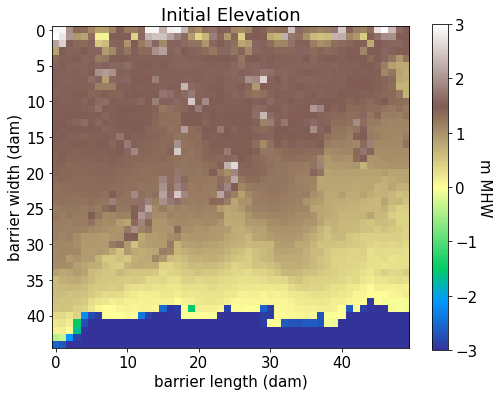

In [5]:
dunes = cascade.barrier3d[0].DuneDomain[cascade.barrier3d[0].time_index - 1]
dunes = np.transpose(dunes) + cascade.barrier3d[0]._BermEl
domain = cascade.barrier3d[0].DomainTS[cascade.barrier3d[0].time_index - 1]
full_domain = np.append(dunes, domain, 0)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    full_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [6]:
cascade.outwash[0]._Qs_shoreface

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 5692.95016223])

In [7]:
# dunes closest to beach

dune_array2 = np.zeros([cascade.barrier3d[0]._time_index-1, cascade.barrier3d[0]._BarrierLength])
for t in range(1, 43):
    beach_dunes2 = cascade.barrier3d[0].DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + cascade.barrier3d[0]._BermEl
    beach_dunes2 = beach_dunes2[0]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
# xticklabels({'1, 10, 20, 30, 40, 40, 60'})
plt.gca().xaxis.tick_bottom()

# dunes closest to beach

dune_array2 = np.zeros([cascade.barrier3d[0]._time_index-1, cascade.barrier3d[0]._BarrierLength])
for t in range(1, 43):
    beach_dunes2 = cascade.barrier3d[0].DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + cascade.barrier3d[0]._BermEl
    beach_dunes2 = beach_dunes2[1]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Bay")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_ylim(bottom=None, top=1)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

IndexError: index 26 is out of bounds for axis 0 with size 26